Import libraries and data

In [1]:
#Libraries
import pandas as pd
import numpy as np

In [2]:
#Data
df = pd.read_csv(r"C:\Users\Alvaro\Desktop\Data Sc/Forecasting Models and Time Series for Business in Python/Daily Bike Sharing.csv", 
                 index_col = "dteday", 
                 parse_dates = True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Select variables
dataset = df.loc[:,["cnt", "holiday", "workingday", "weathersit", "temp", "atemp",
                   "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


Data transformation

In [4]:
#Renaming variable
dataset = dataset.rename(columns = {"cnt" : "y"})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [5]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [6]:
#freq = None - significa que para Python los intervalos no nos frecuentes con el tiempo, esto no es cierto así que necesitamos corregir el parámetro freq
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

Visualization

<AxesSubplot:xlabel='dteday'>

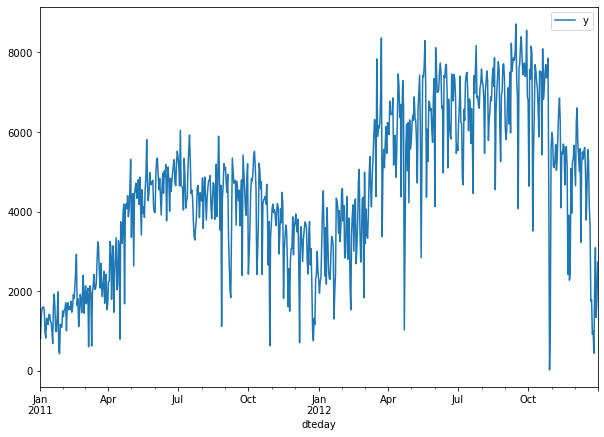

In [7]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

Seasonal decomposition

Una serie temporal se puede dividir en 3 partes:
    - Tendencia
    - Temporalidad
    - Error

Estas partes se pueden combinar de forma aditiva o multiplicativa (cuando hablamos de la seasonality en términos de porcentaje).


In [9]:
#Library

from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_19084\2601581411.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(x = dataset.y,


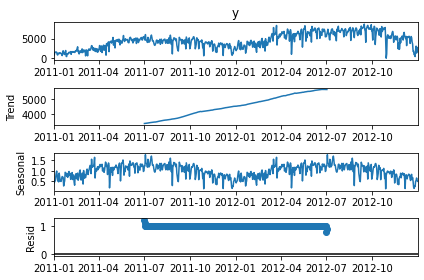

In [13]:
#decomposition
decomposition = seasonal_decompose(x = dataset.y, 
                                   model = "multiplicative", freq = 365)
decomposition.plot();

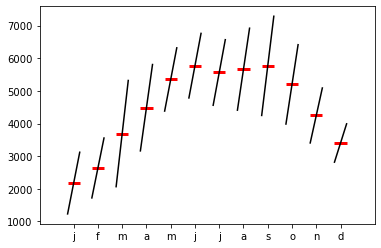

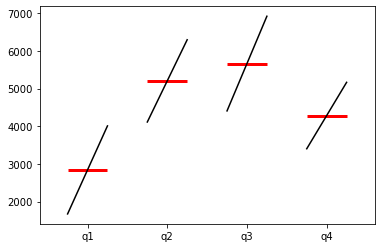

In [15]:
#Seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset.y.resample(rule = "MS").mean()); #MS = month style
quarter_plot(dataset.y.resample(rule = "Q").mean());